In [1]:
import numpy as np

from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

# module to extract data from the csv file
import pandas as pd

# the module for the roc_curve value
from sklearn.metrics import *

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

# The CSV File now contains some historical facts related to the ground water level fluctuation. This can be used for validating the DGSLR model using ROC based validation.

In [2]:
# read the csv file into a numpy array.
validation_data = np.genfromtxt('../Data/data3.csv', delimiter=',', skip_header=1)

print validation_data.shape # to print the shape of the numpy array
validation_data[:] # print the first 10 values of the data

(48, 2)


array([[  6.61,  46.76],
       [  4.4 ,  53.3 ],
       [  9.2 ,  37.65],
       [  7.2 ,  48.51],
       [  5.6 ,  56.35],
       [  4.3 ,  57.37],
       [  3.6 ,  60.32],
       [  6.2 ,  48.77],
       [  8.4 ,  39.98],
       [  8.1 ,  39.98],
       [  5.1 ,  53.87],
       [  6.1 ,  47.31],
       [  4.2 ,  63.2 ],
       [  8.1 ,  39.34],
       [  7.5 ,  55.09],
       [  7.8 ,  44.46],
       [  8.6 ,  40.29],
       [  6.8 ,  46.1 ],
       [  7.4 ,  45.62],
       [  5.2 ,  56.8 ],
       [  5.5 ,  55.15],
       [  3.4 ,  58.47],
       [  8.  ,  47.68],
       [  3.5 ,  63.33],
       [  7.4 ,  44.05],
       [  7.5 ,  43.96],
       [  7.62,  45.4 ],
       [  8.9 ,  39.  ],
       [  8.5 ,  39.76],
       [  9.4 ,  34.42],
       [  8.6 ,  40.74],
       [  8.5 ,  39.37],
       [  7.6 ,  42.93],
       [  8.5 ,  42.  ],
       [  8.9 ,  42.4 ],
       [  5.5 ,  53.3 ],
       [  8.  ,  43.2 ],
       [  6.4 ,  53.98],
       [  5.7 ,  51.75],
       [ 11.1 ,  35.67],


# now we transform this array into one hot encoded values.
# such that first array has the predicted class and second array has the ground truth/ actual class

In [3]:
# function to produce a class for the water-level fluctuation (aka. the actual class)
def actual_class(value):
    ''' 
        function to give the priority class for the water-level fluctuation
        @Param:
        value = the water level fluctuation value
        
        @Return
        the numerical class for the value.
    '''
    # the implementation is a simply condition ladder of the values given in the excel file.
    if(value > 9.56):
        return 0 # priority is very low
    elif(value > 8.02 and value <= 9.56):
        return 1 # priority is low
    elif(value > 6.48 and value <= 8.02):
        return 2 # priority is moderate
    elif(value > 4.94 and value <= 6.48):
        return 3 # priority is high
    else:
        return 4 # priority is very high


In [4]:
# function to produce a class for the DGSLR index value (aka. the predicted class)
def predicted_class(index):
    ''' 
        function to give the priority class for the DGLSR index value
        @Param:
        value = the GWPI index so calcuated
        
        @Return
        the numerical class for the value.
    '''
    # the implementation is a simply condition ladder of the values given in the excel file.
    if(index < 35.92):
        return 0 # priority is very low
    elif(index > 35.92 and index <= 42.41):
        return 1 # priority is low
    elif(index > 42.41 and index <= 48.70):
        return 2 # priority is moderate
    elif(index > 48.70 and index <= 57.20):
        return 3 # priority is high
    else:
        return 4 # priority is very high

In [5]:
n_classes = 5

In [6]:
# initialize the two arrays to zero values
predictions = np.zeros(shape=(validation_data.shape[0], n_classes))
actual_values = np.zeros(shape=(validation_data.shape[0], n_classes))

(predictions[:3], actual_values[:3])

(array([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]]), array([[ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.]]))

In [7]:
# loop through the validation_data and populate the predictions and the actual_values
for i in range(validation_data.shape[0]):
    predictions[i, predicted_class(validation_data[i, 1])] = 1
    actual_values[i, actual_class(validation_data[i, 0])] = 1

In [8]:
# print the predictions
predictions

array([[ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  

In [9]:
# print the actual classes:
actual_values

array([[ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  

In [10]:
# define the reverse label mappings for better visual representation:
reverse_labels_mappings = {
    0: "Very Low priority",
    1: "Low priority",
    2: "Moderate priority",
    3: "High priority",
    4: "Very high priority"
}

In [11]:
# now time to calculate the ROC_auc and generate the curve plots.

# first generate the curves as follows
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(actual_values[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

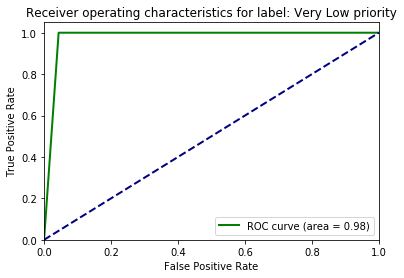

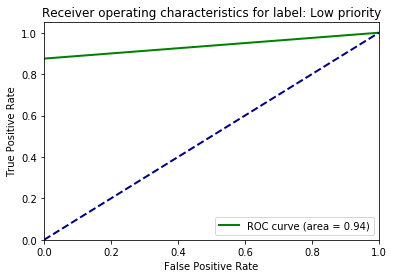

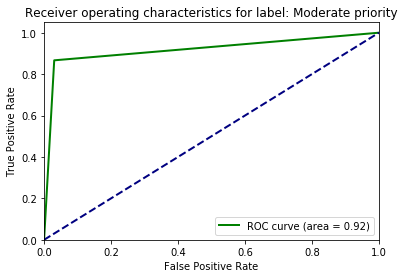

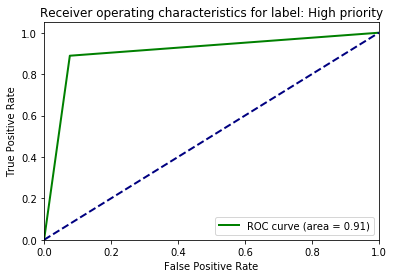

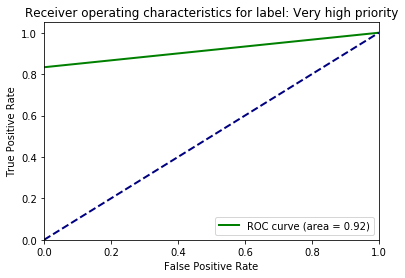

In [12]:
# now plot the 4 roc curves using the calculations
# plot for all the labels

for i in range(n_classes):
    plt.figure()
    lw = 2
    plt.plot(fpr[i], tpr[i], color='green',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristics for label: ' + reverse_labels_mappings[i])
    plt.legend(loc="lower right")
    plt.savefig("../ROC_plots/" + reverse_labels_mappings[i] + ".png")
    plt.show()

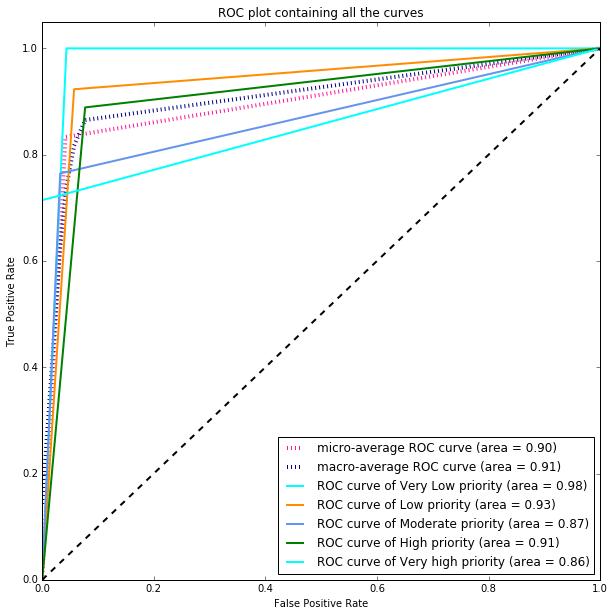

In [13]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(actual_values.ravel(), predictions.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(10, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of ' + reverse_labels_mappings[i] + ' (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC plot containing all the curves')
plt.legend(loc="lower right")
plt.savefig("../ROC_plots/all_curves.png")
plt.show()

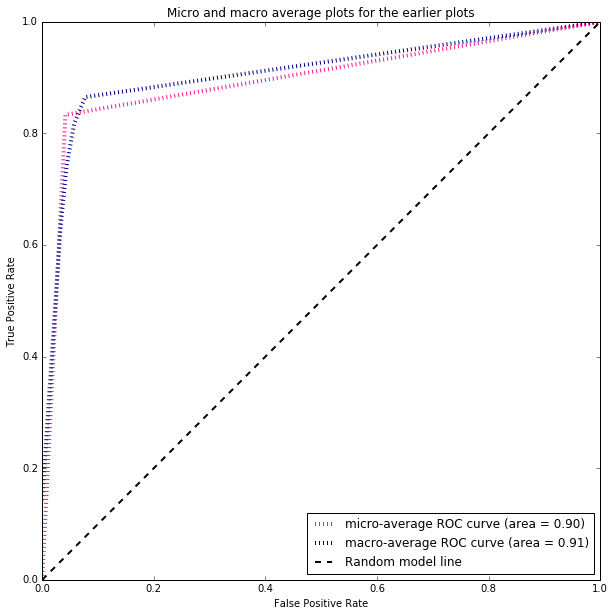

In [14]:
# Plot all ROC curves
plt.figure(figsize=(10, 10))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Micro and macro average plots for the earlier plots')

plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', lw=lw, label='Random model line')

plt.legend(loc="lower right")

plt.savefig("../ROC_plots/micro_and_macro_average.png")

plt.show()